# Multithreading and Multitasking

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import os
import time

### Code Profiling

In [ ]:
#!pip install line_profiler
%load_ext line_profiler

In [ ]:
from functions import sum_of_squares_slow, sum_of_squares_fast

In [ ]:
%lprun -f sum_of_squares_slow sum_of_squares_slow(1_000_000)

In [ ]:
%lprun -f sum_of_squares_fast sum_of_squares_fast(1_000_000)

### Multithreading and Multiprocessing

#### MT and MP 
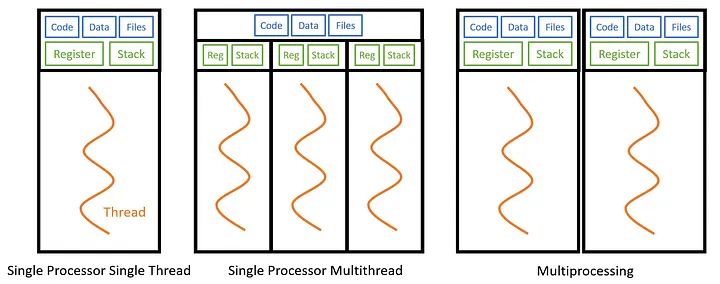
Source: https://towardsdatascience.com/multithreading-and-multiprocessing-in-10-minutes-20d9b3c6a867

In [ ]:
import threading
import multiprocessing

### CPU bound task

--> see multiprocessing_example.py

### I/O bound task

In [ ]:
import urllib
from bs4 import BeautifulSoup
from multiprocessing.dummy import Pool as ThreadPool

In [ ]:
urls = [
  'http://www.python.org',
  'http://www.python.org/about/',
  'http://www.onlamp.com/pub/a/python/2003/04/17/metaclasses.html',
  'http://www.python.org/doc/',
  'http://www.python.org/download/',
  'http://www.python.org/getit/',
  'http://www.python.org/community/',
  'https://wiki.python.org/moin/',
  'http://planet.python.org/',
  'https://wiki.python.org/moin/LocalUserGroups',
  'http://www.python.org/psf/',
  'http://docs.python.org/devguide/',
  'http://www.python.org/community/awards/'
  ]

In [ ]:
req = urllib.request.urlopen(urls[0])
html_content = req.read()
soup = BeautifulSoup(html_content, 'html.parser')

# find latest news section
latest_news = soup.find('div', class_='shrubbery')
print(latest_news)

In [ ]:
%%timeit -n1 -r3

# Use one thread
for url in urls:
    result = urllib.request.urlopen(url)

In [ ]:
%%timeit -n1 -r3

# Use ThreadPool but with only one thread
pool = ThreadPool(1)
pool.map(urllib.request.urlopen, urls)

In [ ]:
%%timeit -n1 -r3

# Use ThreadPool with multiple threads
pool = ThreadPool(4)
pool.map(urllib.request.urlopen, urls)

In [ ]:
nb_threads = np.arange(1, 16, 2)
times = []

for nb_t in nb_threads:
    pool = ThreadPool(nb_t)
    t0 = time.time()
    pool.map(urllib.request.urlopen, urls)
    t1 = time.time()

    times.append(t1- t0)
    
plt.plot(nb_threads, times)
plt.xlabel("Number threads")
plt.ylabel("Time [s]")

### concurrent.futures
https://docs.python.org/3/library/concurrent.futures.html#module-concurrent.futures

In [ ]:
import concurrent.futures

In [ ]:
%%timeit -n1 -r3
with concurrent.futures.ProcessPoolExecutor(max_workers=10) as executor:
    results = executor.map(urllib.request.urlopen, urls)

### Another example: File Saving

--> see file_saving_example.py